### 커피지수 구하여 카토그램으로 표현

- 커피지수 = (스타벅스 매장수 + 커피빈 매장수) / (이디야 매장수 + 빽다방 매장수)

In [1]:
import pandas as pd
from glob import glob
import numpy as np

In [2]:
df_list = []
for file in glob('data/소상공인시장진흥공단_상가(상권)정보_20211231/소상공인시장진흥공단_상가(상권)정보_*_202112.csv' , ):
    cafe = pd.read_csv(file)
    df_list.append(cafe)

df_base = pd.concat(df_list)
df_base.shape

C:\Users\kos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2190348, 39)

- 상권업종중분류코드 = Q12

In [3]:
cafe = df_base.상권업종중분류코드 == 'Q12'
df= df_base[cafe]

In [4]:
# 상호명, 지점명,  시도명, 시군구명, 도로명주소
df = df[['상호명','지점명','시도명','시군구명','도로명주소']]


In [ ]:
df

In [5]:
starbucks = df[df.상호명.str.contains('스타벅스', case=False)]

In [6]:
bean = df[df.상호명.str.contains('커피빈',case=False)]

In [7]:
ediya = df[df.상호명.str.contains('이디야커피' , case=False)]

In [8]:
park = df[df.상호명.str.contains('빽다방',case=False)]

In [9]:
starbucks = starbucks.set_index('상호명')
starbucks = starbucks.reset_index()
starbucks.tail()

,상호명,지점명,시도명,시군구명,도로명주소
1498,스타벅스,충북대점,충청북도,청주시 서원구,충청북도 청주시 서원구 내수동로 113
1499,스타벅스,청주율량DT점,충청북도,청주시 청원구,충청북도 청주시 청원구 충청대로107번길 8
1500,스타벅스,충주연수점,충청북도,충주시,충청북도 충주시 계명대로 227
1501,스타벅스,NaN,충청북도,음성군,충청북도 음성군 원남면 보천로 65
1502,스타벅스,NaN,충청북도,제천시,충청북도 제천시 의림대로31가길 15-1


In [10]:
bean = bean.set_index('상호명')
bean = bean.reset_index()
bean.tail()

,상호명,지점명,시도명,시군구명,도로명주소
249,커피빈,코리아제주아라점,제주특별자치도,제주시,제주특별자치도 제주시 연북로 511
250,커피빈,코리아천안신부동점,충청남도,천안시 동남구,충청남도 천안시 동남구 만남로 48
251,커피빈,NaN,충청남도,금산군,충청남도 금산군 금산읍 비선길 44
252,커피빈,코리아청주점,충청북도,청주시 상당구,충청북도 청주시 상당구 상당로69번길 20
253,커피빈,NaN,충청북도,제천시,충청북도 제천시 독순로11길 1


In [11]:
ediya = ediya.set_index('상호명')
ediya = ediya.reset_index()
ediya.tail()

,상호명,지점명,시도명,시군구명,도로명주소
2023,이디야커피,칠금점,충청북도,충주시,충청북도 충주시 신립로 80
2024,이디야커피,금천스타힐스점,충청북도,청주시 상당구,충청북도 청주시 상당구 쇠내로 48
2025,이디야커피,제천의림점,충청북도,제천시,충청북도 제천시 칠성로 74
2026,이디야커피,사직중앙점,충청북도,청주시 서원구,충청북도 청주시 서원구 사직대로 282
2027,이디야커피,증평송산점,충청북도,증평군,충청북도 증평군 증평읍 송산로1길 17-25


In [12]:
park = park.set_index('상호명')
park = park.reset_index()
park.tail()

,상호명,지점명,시도명,시군구명,도로명주소
721,빽다방,청주동남점,충청북도,청주시 상당구,충청북도 청주시 상당구 중고개로141번길 11-1
722,빽다방,NaN,충청북도,진천군,충청북도 진천군 덕산읍 시가로 14
723,빽다방,청주테크노폴리스점,충청북도,청주시 흥덕구,충청북도 청주시 흥덕구 송화로184번길 4
724,빽다방,NaN,충청북도,청주시 청원구,충청북도 청주시 청원구 율중로79번길 8
725,빽다방,충북보은점,충청북도,보은군,충청북도 보은군 보은읍 삼산로 42-1


In [13]:
starbucks.시군구명.nunique(), bean.시군구명.nunique(), ediya.시군구명.nunique(), park.시군구명.nunique()

(170, 84, 217, 158)

In [ ]:
st = starbucks['시군구명'].value_counts()
be = bean['시군구명'].value_counts()
ed = ediya['시군구명'].value_counts()
pa = park['시군구명'].value_counts()

In [ ]:
len(df.시군구명.unique())

In [14]:
# 고성군 - 고성(강원), 고성(경남)
# 광역시 - 서울 용산, 서울 서대문, 대전 서구, 대전 유성, 세종
# 행정구 - 수원 장안, 용인 수지, 고양 일산동, 창원 합포, 창원 회원
tmp_gu_dict = {
    '수원': ['장안구', '권선구', '팔달구', '영통구'], 
    '성남': ['수정구', '중원구', '분당구'], 
    '안양': ['만안구', '동안구'], 
    '안산': ['상록구', '단원구'], 
    '고양': ['덕양구', '일산동구', '일산서구'], 
    '용인': ['처인구', '기흥구', '수지구'], 
    '청주': ['상당구', '서원구', '흥덕구', '청원구'], 
    '천안': ['동남구', '서북구'], 
    '전주': ['완산구', '덕진구'], 
    '포항': ['남구', '북구'], 
    '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [ ]:
metro_list= ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']
si_name = [None] * len(df.시군구명.unique())

In [ ]:
print(metro_list)

In [ ]:
print(si_name)

# 상호명	시도명	시군구명	도로명주소

In [17]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']

def get_ID(df):
    si_name = [None] * len(df)

    for i in df.index:
        if df.시도명[i] in metro_list:
            if len(df.시군구명[i]) == 2:
                si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i]
            else:
                si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i][:-1]     # 긴 구 이름에서 '구' 제외
        else:
            si_len = len(df.시군구명[i].split())
            if si_len == 1:
                if df.시군구명[i][:-1] == '고성':
                    if df.시도명[i] == '강원도':
                        si_name[i] = '고성(강원)'
                    else:
                        si_name[i] = '고성(경남)'
                elif df.시군구명[i][:-1] in tmp_gu_dict.keys():  # 시군구명에 시 이름만 있는 것이 있음
                    if len(df.도로명주소[i].split()[2]) == 5:
                        si_name[i] = df.시군구명[i][:2] + ' ' + df.도로명주소[i].split()[2][2:-1]
                    else:
                        si_name[i] = df.시군구명[i][:2] + ' ' + df.도로명주소[i].split()[2][:-1]
                elif df.시군구명[i][:2] == '세종':
                    si_name[i] = '세종'
                else:
                    si_name[i] = df.시군구명[i][:-1]

            else:
                _, admingu = df.시군구명[i].split()
                for key, values in tmp_gu_dict.items():
                    if admingu in values:
                        if len(admingu) == 2:
                            si_name[i] = key + ' ' + admingu
                        elif admingu in ['마산합포구', '마산회원구']:
                            si_name[i] = key + ' ' + admingu[2:-1]
                        else:
                            si_name[i] = key + ' ' + admingu[:-1]

    return si_name

In [18]:
print(si_name)

NameError: name 'si_name' is not defined

In [19]:
starbucks['ID'] = get_ID(starbucks)
starbucks

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉
1,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 316,춘천
2,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천
3,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초
4,스타벅스,원주터미널점,강원도,원주시,강원도 원주시 서원대로 178,원주
...,...,...,...,...,...,...
1498,스타벅스,충북대점,충청북도,청주시 서원구,충청북도 청주시 서원구 내수동로 113,청주 서원
1499,스타벅스,청주율량DT점,충청북도,청주시 청원구,충청북도 청주시 청원구 충청대로107번길 8,청주 청원
1500,스타벅스,충주연수점,충청북도,충주시,충청북도 충주시 계명대로 227,충주
1501,스타벅스,NaN,충청북도,음성군,충청북도 음성군 원남면 보천로 65,음성


In [22]:
print(np.sort(starbucks.ID.unique()))
sb_set = set(starbucks.ID.unique())
print(len(sb_set))

['가평' '강릉' '거제' '경산' '경주' '계룡' '고령' '고성(강원)' '고양 덕양' '고양 일산동' '고양 일산서'
 '공주' '과천' '광명' '광양' '광주' '광주 광산' '광주 남구' '광주 동구' '광주 북구' '광주 서구' '구리'
 '구미' '군산' '군포' '김천' '김포' '김해' '나주' '남양주' '논산' '당진' '대구 남구' '대구 달서'
 '대구 달성' '대구 동구' '대구 북구' '대구 서구' '대구 수성' '대구 중구' '대전 대덕' '대전 동구' '대전 서구'
 '대전 유성' '대전 중구' '동두천' '동해' '목포' '무안' '문경' '밀양' '보령' '보은' '부산 강서' '부산 금정'
 '부산 기장' '부산 남구' '부산 동구' '부산 동래' '부산 부산진' '부산 북구' '부산 사상' '부산 사하' '부산 서구'
 '부산 수영' '부산 연제' '부산 영도' '부산 중구' '부산 해운대' '부안' '부천' '사천' '산청' '서귀포' '서산'
 '서울 강남' '서울 강동' '서울 강북' '서울 강서' '서울 관악' '서울 광진' '서울 구로' '서울 금천' '서울 노원'
 '서울 도봉' '서울 동대문' '서울 동작' '서울 마포' '서울 서대문' '서울 서초' '서울 성동' '서울 성북' '서울 송파'
 '서울 양천' '서울 영등포' '서울 용산' '서울 은평' '서울 종로' '서울 중구' '서울 중랑' '서천' '성남 분당'
 '성남 수정' '성남 중원' '성주' '세종' '속초' '수원 권선' '수원 영통' '수원 장안' '수원 팔달' '순천' '시흥'
 '아산' '안동' '안산 단원' '안산 상록' '안성' '안양 동안' '안양 만안' '양산' '양주' '양평' '여수' '여주'
 '영덕' '영양' '예산' '오산' '용인 기흥' '용인 수지' '용인 처인' '울산 남구' '울산 동구' '울산 북구'
 '울산 울주' '울산 중구' '원주' '음성' '의왕' '의정부' '이천' '익산' '인제' '인천 강화' 

In [23]:
ediya['ID'] = get_ID(ediya)
print(np.sort(ediya.ID.unique()))
ed_set = set(ediya.ID.unique())
print(len(ed_set))

['가평' '강릉' '강진' '거제' '거창' '경산' '경주' '고령' '고성(경남)' '고양 덕양' '고양 일산동'
 '고양 일산서' '고창' '고흥' '곡성' '공주' '과천' '광명' '광양' '광주' '광주 광산' '광주 남구' '광주 동구'
 '광주 북구' '광주 서구' '괴산' '구례' '구리' '구미' '군산' '군포' '금산' '김제' '김천' '김포' '김해'
 '나주' '남양주' '남원' '남해' '논산' '단양' '담양' '당진' '대구 남구' '대구 달서' '대구 달성' '대구 동구'
 '대구 북구' '대구 서구' '대구 수성' '대구 중구' '대전 대덕' '대전 동구' '대전 서구' '대전 유성' '대전 중구'
 '동두천' '동해' '목포' '무안' '무주' '문경' '밀양' '보령' '보은' '부산 강서' '부산 금정' '부산 기장'
 '부산 남구' '부산 동구' '부산 동래' '부산 부산진' '부산 북구' '부산 사상' '부산 사하' '부산 서구' '부산 수영'
 '부산 연제' '부산 영도' '부산 중구' '부산 해운대' '부안' '부여' '부천' '사천' '산청' '삼척' '상주' '서귀포'
 '서산' '서울 강남' '서울 강동' '서울 강북' '서울 강서' '서울 관악' '서울 광진' '서울 구로' '서울 금천'
 '서울 노원' '서울 도봉' '서울 동대문' '서울 동작' '서울 마포' '서울 서대문' '서울 서초' '서울 성동' '서울 성북'
 '서울 송파' '서울 양천' '서울 영등포' '서울 용산' '서울 은평' '서울 종로' '서울 중구' '서울 중랑' '서천'
 '성남 분당' '성남 수정' '성남 중원' '성주' '세종' '속초' '수원 권선' '수원 영통' '수원 장안' '수원 팔달'
 '순창' '순천' '시흥' '신안' '아산' '안동' '안산 단원' '안산 상록' '안성' '안양 동안' '안양 만안' '양구'
 '양산' '양양' '양주' '양평' '여수' '여주' '연천' '영광' '영덕' '영동' '영암' '영월

In [25]:
bean['ID'] = get_ID(bean)
print(np.sort(bean.ID.unique()))
cb_set = set(bean.ID.unique())
print(len(cb_set))

['경주' '고양 덕양' '고양 일산동' '고양 일산서' '광명' '광주 남구' '광주 동구' '광주 서구' '군포' '금산'
 '김포' '김해' '남양주' '대구 수성' '대구 중구' '대전 서구' '대전 유성' '동해' '부산 강서' '부산 기장'
 '부산 동구' '부산 부산진' '부산 북구' '부산 수영' '부산 중구' '부산 해운대' '부천' '상주' '서울 강남'
 '서울 강동' '서울 강서' '서울 관악' '서울 광진' '서울 구로' '서울 금천' '서울 노원' '서울 동대문' '서울 동작'
 '서울 마포' '서울 서대문' '서울 서초' '서울 성동' '서울 성북' '서울 송파' '서울 양천' '서울 영등포' '서울 용산'
 '서울 은평' '서울 종로' '서울 중구' '서울 중랑' '성남 분당' '성남 수정' '성남 중원' '수원 권선' '수원 영통'
 '수원 장안' '수원 팔달' '안양 동안' '안양 만안' '여주' '연천' '영덕' '용인 기흥' '용인 수지' '용인 처인'
 '울산 남구' '울산 중구' '울진' '원주' '이천' '인천 남동' '인천 부평' '인천 연수' '인천 중구' '전주 완산'
 '제주' '제천' '진주' '창원 성산' '창원 진해' '창원 합포' '천안 동남' '청송' '청주 상당' '통영' '파주'
 '평택' '포항 북구' '하남' '함안' '화성']
92


In [26]:
park['ID'] = get_ID(park)
print(np.sort(park.ID.unique()))
bd_set = set(park.ID.unique())
print(len(bd_set))

['강릉' '거창' '경산' '경주' '고령' '고성(경남)' '고양 덕양' '고양 일산동' '고양 일산서' '고창' '공주'
 '광명' '광양' '광주' '광주 광산' '광주 남구' '광주 동구' '광주 북구' '광주 서구' '구리' '구미' '군산'
 '군포' '금산' '김제' '김천' '김포' '김해' '나주' '남양주' '남원' '논산' '당진' '대구 달서' '대구 달성'
 '대구 동구' '대구 북구' '대구 서구' '대구 수성' '대구 중구' '대전 대덕' '대전 동구' '대전 서구' '대전 유성'
 '대전 중구' '동두천' '동해' '목포' '무안' '문경' '보령' '보은' '부산 금정' '부산 남구' '부산 동래'
 '부산 부산진' '부산 북구' '부산 사하' '부산 중구' '부산 해운대' '부안' '부천' '삼척' '서귀포' '서산'
 '서울 강남' '서울 강동' '서울 강북' '서울 강서' '서울 관악' '서울 광진' '서울 구로' '서울 금천' '서울 노원'
 '서울 도봉' '서울 동대문' '서울 동작' '서울 마포' '서울 서대문' '서울 서초' '서울 성동' '서울 성북' '서울 송파'
 '서울 양천' '서울 영등포' '서울 용산' '서울 은평' '서울 종로' '서울 중구' '서울 중랑' '성남 분당' '성남 수정'
 '성남 중원' '세종' '수원 권선' '수원 영통' '수원 장안' '수원 팔달' '순천' '시흥' '아산' '안동' '안산 단원'
 '안산 상록' '안양 동안' '안양 만안' '양산' '양주' '양평' '여수' '영동' '영암' '영주' '영천' '예산' '예천'
 '오산' '옥천' '용인 기흥' '용인 수지' '용인 처인' '울산 남구' '울산 동구' '울산 북구' '울진' '원주' '의왕'
 '의정부' '이천' '익산' '인천 강화' '인천 계양' '인천 남동' '인천 동구' '인천 미추홀' '인천 부평' '인천 서구'
 '인천 연수' '인천 중구' '전주 덕진' '전주 완산' '정읍' '제주' '증평' '진안' '진

In [27]:
city_set = sb_set | ed_set | cb_set | bd_set
len(city_set)

244

In [30]:
pt_sb = starbucks.pivot_table('상호명', index='ID', aggfunc='count')
pt_sb.columns = ['스타벅스']
pt_sb.reset_index(inplace=True)
pt_sb.head()

,ID,스타벅스
0,가평,2
1,강릉,4
2,거제,6
3,경산,8
4,경주,7


In [32]:
pt_cb = bean.pivot_table('상호명', index='ID', aggfunc='count')
pt_cb.columns = ['커피빈']
pt_cb.reset_index(inplace=True)
pt_cb.head()

,ID,커피빈
0,경주,2
1,고양 덕양,1
2,고양 일산동,1
3,고양 일산서,1
4,광명,1


In [33]:
pt_ed = ediya.pivot_table('상호명', index='ID', aggfunc='count')
pt_ed.columns = ['이디야']
pt_ed.reset_index(inplace=True)
pt_ed.head()

,ID,이디야
0,가평,8
1,강릉,17
2,강진,1
3,거제,9
4,거창,1


In [35]:
pt_bd = park.pivot_table('상호명', index='ID', aggfunc='count')
pt_bd.columns = ['빽다방']
pt_bd.reset_index(inplace=True)
pt_bd.head()

,ID,빽다방
0,강릉,2
1,거창,1
2,경산,4
3,경주,1
4,고령,1


In [36]:
cf = pd.merge(pt_ed, pt_sb, how='left')
cf = pd.merge(cf, pt_cb, how='left')
cf = pd.merge(cf, pt_bd, how='left')
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방
0,가평,8,2.0,NaN,NaN
1,강릉,17,4.0,NaN,2.0
2,강진,1,NaN,NaN,NaN
3,거제,9,6.0,NaN,NaN
4,거창,1,NaN,NaN,1.0


In [37]:
cf.fillna(0, inplace=True)
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방
0,가평,8,2.0,0.0,0.0
1,강릉,17,4.0,0.0,2.0
2,강진,1,0.0,0.0,0.0
3,거제,9,6.0,0.0,0.0
4,거창,1,0.0,0.0,1.0


In [38]:
cf['스타벅스'] = cf.스타벅스.astype(int)
cf['커피빈'] = cf.커피빈.astype(int)
cf['빽다방'] = cf.빽다방.astype(int)
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방
0,가평,8,2,0,0
1,강릉,17,4,0,2
2,강진,1,0,0,0
3,거제,9,6,0,0
4,거창,1,0,0,1


In [39]:
cf['커피지수'] = (cf.스타벅스 + cf.커피빈) / (cf.이디야 + cf.빽다방)
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,가평,8,2,0,0,0.250000
1,강릉,17,4,0,2,0.210526
2,강진,1,0,0,0,0.000000
3,거제,9,6,0,0,0.666667
4,거창,1,0,0,1,0.000000


In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [42]:
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [43]:
map_raw.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [44]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.shape

(250, 3)

In [45]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [46]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

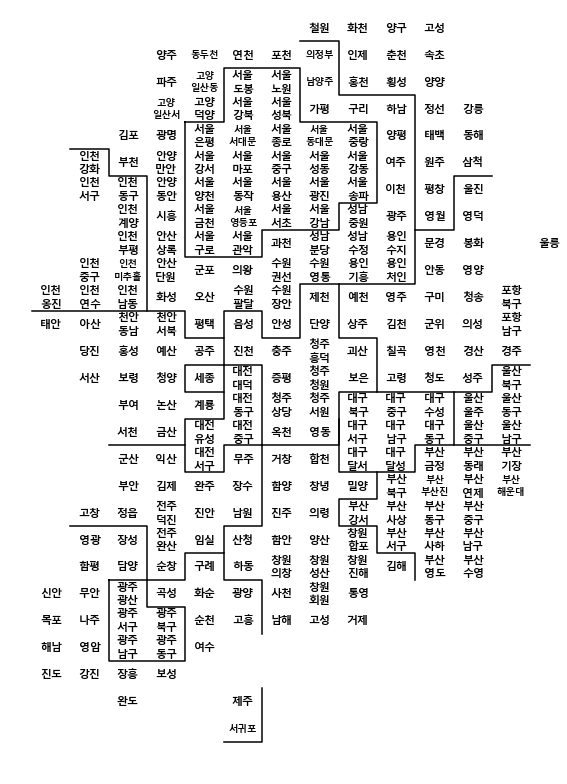

In [47]:
plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
cf = pd.merge(cf, map)
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방,커피지수,y,x
0,가평,8,2,0,0,0.250000,3,7
1,강릉,17,4,0,2,0.210526,3,11
2,강진,1,0,0,0,0.000000,24,1
3,거제,9,6,0,0,0.666667,22,8
4,거창,1,0,0,1,0.000000,16,6


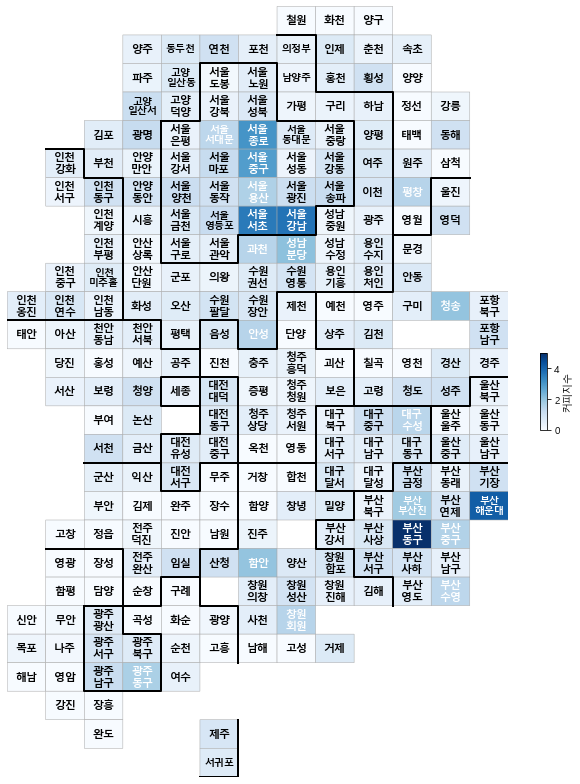

In [50]:
drawKorea('커피지수', cf, 'Blues')